In [1]:
import random
from collections import defaultdict, deque

# 读取图数据并构建邻接表
def load_graph(file_path):
    vertices = {}  # 存储顶点: {vertex_id: vertex_label}
    edges = []     # 存储边: [(v1, v2, edge_label)]
    adj_list = defaultdict(list)  # 邻接表: {vertex_id: [(neighbor_id, edge_label)]}

    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if parts[0] == 'v':  # 顶点行
                vertex_id, vertex_label = int(parts[1]), int(parts[2])
                vertices[vertex_id] = vertex_label
            elif parts[0] == 'e':  # 边行
                v1, v2, edge_label = int(parts[1]), int(parts[2]), int(parts[3])
                edges.append((v1, v2, edge_label))
                adj_list[v1].append((v2, edge_label))
                adj_list[v2].append((v1, edge_label))  # 如果是无向图，添加反向边

    print(f"Loaded {len(vertices)} vertices and {len(edges)} edges.")

    return vertices, edges, adj_list

# 使用 BFS 随机采样子图
def sample_subgraph(vertices, adj_list, start_vertex, max_size=5):
    sampled_vertices = set()  # 已采样的顶点集合
    sampled_edges = set()    # 已采样的边集合
    queue = deque([start_vertex])
    sampled_vertices.add(start_vertex)

    while queue and len(sampled_vertices) < max_size:
        current_vertex = queue.popleft()
        # 获取当前顶点的所有邻居
        neighbors = adj_list[current_vertex]
        # 随机打乱邻居顺序
        random.shuffle(neighbors)
        # 随机选择最多剩余容量个邻居
        remaining_capacity = max_size - len(sampled_vertices)
        selected_neighbors = neighbors[:min(remaining_capacity, len(neighbors))]

        for neighbor_id, edge_label in selected_neighbors:
            if neighbor_id not in sampled_vertices:
                sampled_vertices.add(neighbor_id)
                queue.append(neighbor_id)
            sampled_edges.add((min(current_vertex, neighbor_id), 
                              max(current_vertex, neighbor_id), 
                              edge_label))  # 确保边按顺序存储，避免重复

    return sampled_vertices, sampled_edges

# 输出子图
def print_subgraph(vertices, sampled_vertices, sampled_edges):
    print("Sampled Subgraph:")
    # 输出顶点
    for vertex_id in sorted(sampled_vertices):
        print(f"v {vertex_id} {vertices[vertex_id]}")
    # 输出边
    for v1, v2, edge_label in sorted(sampled_edges):
        print(f"e {v1} {v2} {edge_label}")

# 主函数
def main(file_path="data.graph", subgraph_size=5):
    # 加载图数据
    vertices, edges, adj_list = load_graph(file_path)
    # 随机选择起始节点
    start_vertex = random.choice(list(vertices.keys()))
    # 采样子图
    sampled_vertices, sampled_edges = sample_subgraph(vertices, adj_list, start_vertex, subgraph_size)
    # 输出结果
    print_subgraph(vertices, sampled_vertices, sampled_edges)

# 示例运行
if __name__ == "__main__":
    # 假设你的文件名为 "data.graph"
    main("/home/cc/haibin2/livejournal/30/data_graph/data.graph", subgraph_size=5)

Sampled Subgraph:
v 157709 10
v 228990 14
v 845495 25
v 3036778 13
v 3036779 5
e 157709 228990 0
e 228990 845495 0
e 228990 3036778 0
e 228990 3036779 0


In [7]:
import random
from collections import defaultdict, deque

# 读取图数据并构建邻接表和边集合
def load_graph(file_path):
    vertices = {}  # 存储顶点: {vertex_id: vertex_label}
    edges = set()  # 存储边: {(v1, v2, edge_label)}，用集合避免重复
    adj_list = defaultdict(list)  # 邻接表: {vertex_id: [(neighbor_id, edge_label)]}

    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if parts[0] == 'v':  # 顶点行
                vertex_id, vertex_label = int(parts[1]), int(parts[2])
                vertices[vertex_id] = vertex_label
            elif parts[0] == 'e':  # 边行
                v1, v2, edge_label = int(parts[1]), int(parts[2]), int(parts[3])
                # 确保 v1 <= v2，避免重复边
                edge = (min(v1, v2), max(v1, v2), edge_label)
                edges.add(edge)
                adj_list[v1].append((v2, edge_label))
                adj_list[v2].append((v1, edge_label))  # 如果是无向图，添加反向边

    print(f"Loaded {len(vertices)} vertices and {len(edges)} edges.")

    return vertices, edges, adj_list

# 使用 BFS 随机采样顶点
def sample_vertices(vertices, adj_list, start_vertex, max_size=5):
    sampled_vertices = set()  # 已采样的顶点集合
    queue = deque([start_vertex])
    sampled_vertices.add(start_vertex)

    while queue and len(sampled_vertices) < max_size:
        current_vertex = queue.popleft()
        # 获取当前顶点的所有邻居
        neighbors = adj_list[current_vertex]
        # 随机打乱邻居顺序
        random.shuffle(neighbors)
        # 随机选择最多剩余容量个邻居
        remaining_capacity = max_size - len(sampled_vertices)
        selected_neighbors = neighbors[:min(remaining_capacity, len(neighbors))]

        for neighbor_id, _ in selected_neighbors:
            if neighbor_id not in sampled_vertices:
                sampled_vertices.add(neighbor_id)
                queue.append(neighbor_id)

    return sampled_vertices

# 获取采样顶点之间的所有边（诱导子图）
def get_induced_subgraph_edges(edges, sampled_vertices):
    sampled_edges = set()
    for v1, v2, edge_label in edges:
        if v1 in sampled_vertices and v2 in sampled_vertices:
            sampled_edges.add((v1, v2, edge_label))
    return sampled_edges

# 输出子图
def print_subgraph(vertices, sampled_vertices, sampled_edges):
    print("Sampled Induced Subgraph:")
    # 输出顶点
    for vertex_id in sorted(sampled_vertices):
        print(f"v {vertex_id} {vertices[vertex_id]}")
    # 输出边
    for v1, v2, edge_label in sorted(sampled_edges):
        print(f"e {v1} {v2} {edge_label}")

# 主函数
def main(file_path="data.graph", subgraph_size=5):
    print("Loading graph data...")
    # 加载图数据
    vertices, edges, adj_list = load_graph(file_path)
    # 随机选择起始节点
    start_vertex = random.choice(list(vertices.keys()))
    # 采样顶点
    sampled_vertices = sample_vertices(vertices, adj_list, start_vertex, subgraph_size)
    # 获取诱导子图的边
    sampled_edges = get_induced_subgraph_edges(edges, sampled_vertices)
    # 输出结果
    print_subgraph(vertices, sampled_vertices, sampled_edges)

# 示例运行
if __name__ == "__main":
    main("/home/cc/haibin2/livejournal/30/data_graph/data.graph", subgraph_size=5)

main("/home/cc/haibin2/livejournal/30/data_graph/data.graph", subgraph_size=5)

Loading graph data...
Loaded 4846609 vertices and 38566113 edges.
Sampled Induced Subgraph:
v 467876 28
v 483481 18
v 731005 27
v 1288126 1
v 1422406 8
e 467876 483481 0
e 483481 731005 0
e 483481 1288126 0
e 483481 1422406 0
e 731005 1288126 0
e 731005 1422406 0
e 1288126 1422406 0


In [10]:
import random
from collections import defaultdict, deque

# 读取图数据并构建邻接表和边集合
def load_graph(file_path):
    vertices = {}  # 存储顶点: {vertex_id: vertex_label}
    edges = set()  # 存储边: {(v1, v2, edge_label)}
    adj_list = defaultdict(list)  # 邻接表: {vertex_id: [(neighbor_id, edge_label)]}

    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if parts[0] == 'v':  # 顶点行
                vertex_id, vertex_label = int(parts[1]), int(parts[2])
                vertices[vertex_id] = vertex_label
            elif parts[0] == 'e':  # 边行
                v1, v2, edge_label = int(parts[1]), int(parts[2]), int(parts[3])
                edge = (min(v1, v2), max(v1, v2), edge_label)  # 确保 v1 <= v2
                edges.add(edge)
                adj_list[v1].append((v2, edge_label))
                adj_list[v2].append((v1, edge_label))  # 无向图

    return vertices, edges, adj_list

# 使用 BFS 随机采样顶点
def sample_vertices(vertices, adj_list, start_vertex, max_size=5):
    sampled_vertices = set()
    queue = deque([start_vertex])
    sampled_vertices.add(start_vertex)

    while queue and len(sampled_vertices) < max_size:
        current_vertex = queue.popleft()
        neighbors = adj_list[current_vertex]
        random.shuffle(neighbors)
        remaining_capacity = max_size - len(sampled_vertices)
        selected_neighbors = neighbors[:min(remaining_capacity, len(neighbors))]

        for neighbor_id, _ in selected_neighbors:
            if neighbor_id not in sampled_vertices:
                sampled_vertices.add(neighbor_id)
                queue.append(neighbor_id)

    return sampled_vertices

# 获取采样顶点之间的所有边（诱导子图）
def get_induced_subgraph_edges(edges, sampled_vertices):
    sampled_edges = set()
    for v1, v2, edge_label in edges:
        if v1 in sampled_vertices and v2 in sampled_vertices:
            sampled_edges.add((v1, v2, edge_label))
    return sampled_edges

# 重构子图索引
def remap_subgraph(vertices, sampled_vertices, sampled_edges):
    # 创建旧 ID 到新 ID 的映射，从 1 开始
    old_to_new = {old_id: new_id for new_id, old_id in enumerate(sorted(sampled_vertices), 1)}
    # 重构顶点: {new_id: label}
    remapped_vertices = {old_to_new[old_id]: vertices[old_id] for old_id in sampled_vertices}
    # 重构边: [(new_v1, new_v2, edge_label)]
    remapped_edges = {(old_to_new[v1], old_to_new[v2], edge_label) for v1, v2, edge_label in sampled_edges}
    return remapped_vertices, remapped_edges

# 输出重构后的子图
def print_remapped_subgraph(remapped_vertices, remapped_edges):
    print("Remapped Induced Subgraph:")
    # 输出顶点
    for vertex_id in sorted(remapped_vertices.keys()):
        print(f"v {vertex_id} {remapped_vertices[vertex_id]}")
    # 输出边
    for v1, v2, edge_label in sorted(remapped_edges):
        print(f"e {v1} {v2} {edge_label}")

# 主函数
def main(file_path="data.graph", subgraph_size=5):
    print("Loading graph data...")
    vertices, edges, adj_list = load_graph(file_path)
    print(f"Loaded {len(vertices)} vertices and {len(edges)} edges.")
    
    start_vertex = random.choice(list(vertices.keys()))
    sampled_vertices = sample_vertices(vertices, adj_list, start_vertex, subgraph_size)
    sampled_edges = get_induced_subgraph_edges(edges, sampled_vertices)
    
    # 重构索引
    remapped_vertices, remapped_edges = remap_subgraph(vertices, sampled_vertices, sampled_edges)
    print_remapped_subgraph(remapped_vertices, remapped_edges)

# 示例运行
if __name__ == "__main":
    main("data.graph", subgraph_size=5)

main("/home/cc/haibin2/livejournal/30/data_graph/data.graph", subgraph_size=8)


Loading graph data...
Loaded 4846609 vertices and 38566113 edges.
Remapped Induced Subgraph:
v 1 21
v 2 5
v 3 28
v 4 8
v 5 27
v 6 26
v 7 22
v 8 0
e 1 2 0
e 2 3 0
e 2 4 0
e 2 5 0
e 2 6 0
e 2 7 0
e 2 8 0
e 3 6 0
e 6 8 0


Loading graph data...
Loaded 4846609 vertices and 38566113 edges.
Remapped Induced Subgraph:
v 0 23
v 1 9
v 2 10
v 3 10
v 4 4
v 5 17
v 6 25
e 0 3 0
e 0 5 0
e 0 6 0
e 1 5 0
e 2 4 0
e 3 5 0
e 3 6 0
e 4 5 0
e 4 6 0
e 5 6 0
Vertex count: 7, Edge count: 10


/tmp/ipykernel_799860/3835670254.py:85: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_799860/3835670254.py:85: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_799860/3835670254.py:90: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  plt.savefig(f"subgraph_{figure_index}.png", format="PNG", dpi=150)
/tmp/ipykernel_799860/3835670254.py:90: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.savefig(f"subgraph_{figure_index}.png", format="PNG", dpi=150)
/home/cc/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/cc/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170

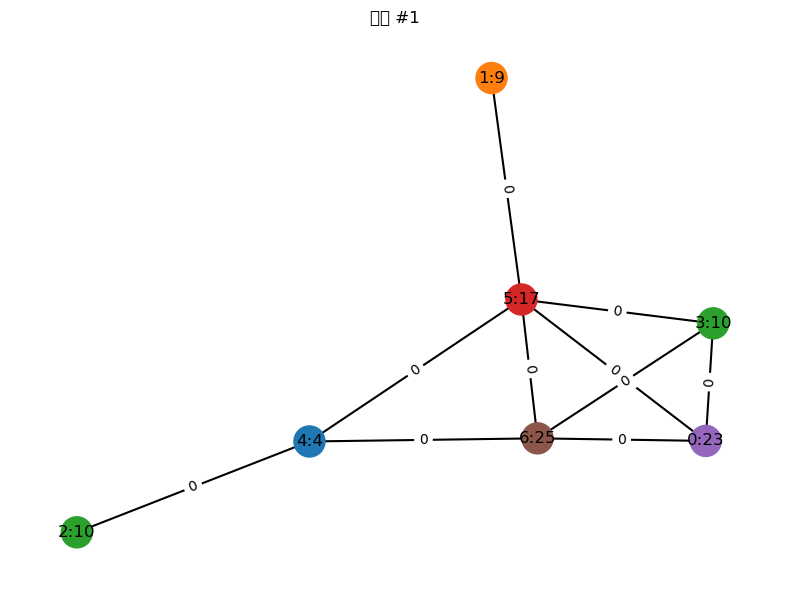

Remapped Induced Subgraph:
v 0 27
v 1 27
v 2 12
v 3 3
v 4 11
v 5 26
v 6 8
e 0 1 0
e 0 2 0
e 0 3 0
e 0 5 0
e 0 6 0
e 2 3 0
e 2 4 0
e 2 5 0
e 3 5 0
e 4 6 0
Vertex count: 7, Edge count: 10


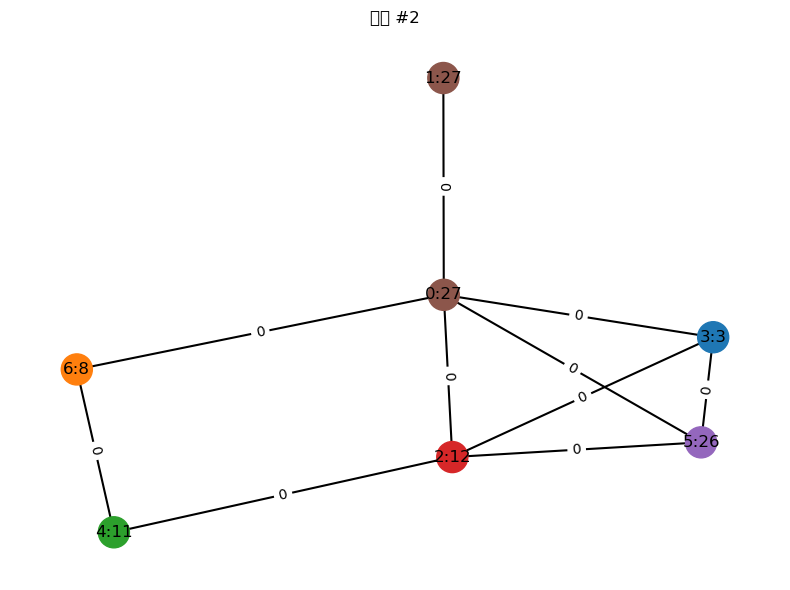

Remapped Induced Subgraph:
v 0 22
v 1 29
v 2 27
v 3 0
v 4 20
v 5 29
v 6 5
v 7 3
v 8 8
v 9 21
e 0 1 0
e 0 5 0
e 1 5 0
e 2 5 0
e 3 5 0
e 3 7 0
e 4 5 0
e 5 6 0
e 5 8 0
e 5 9 0
Vertex count: 10, Edge count: 10


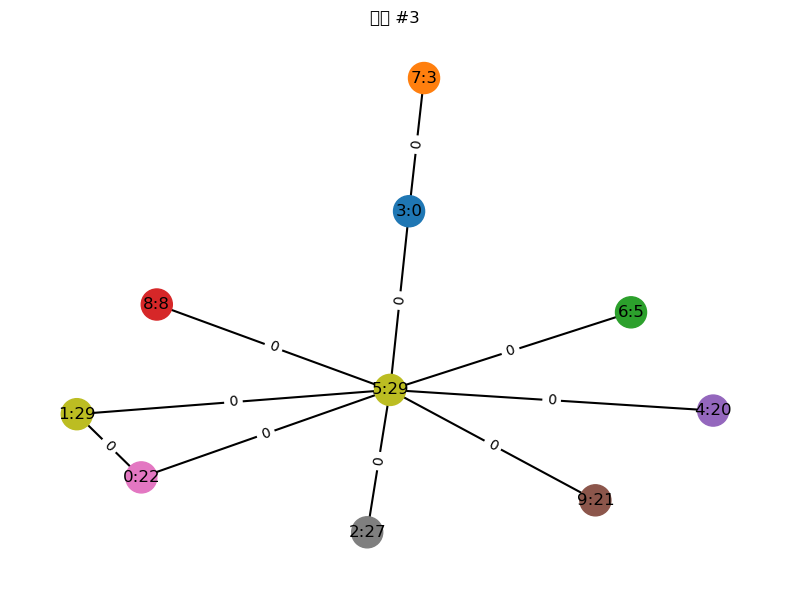

Remapped Induced Subgraph:
v 0 28
v 1 12
v 2 9
v 3 1
v 4 13
v 5 14
v 6 10
v 7 5
v 8 20
e 0 4 0
e 1 4 0
e 2 4 0
e 3 4 0
e 4 5 0
e 4 6 0
e 4 7 0
e 4 8 0
e 5 6 0
e 6 7 0
Vertex count: 9, Edge count: 10


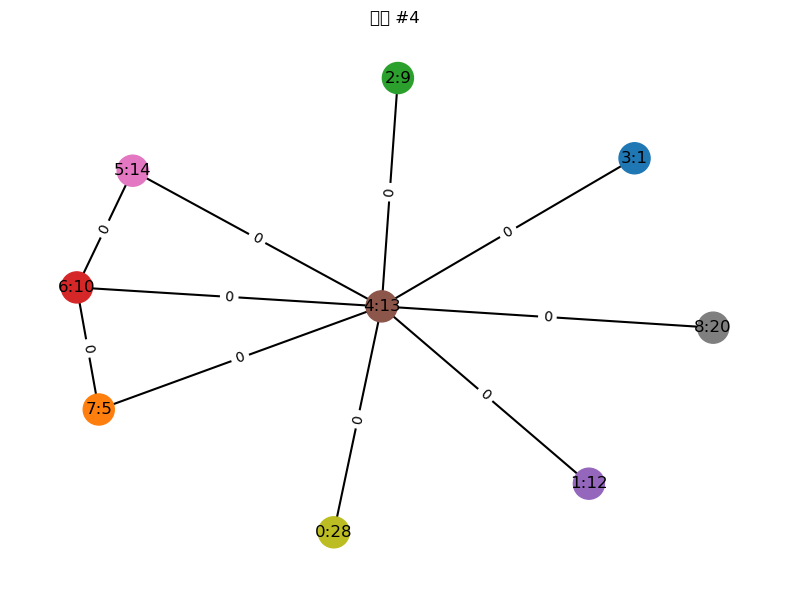

Remapped Induced Subgraph:
v 0 14
v 1 18
v 2 17
v 3 24
v 4 23
v 5 3
v 6 5
v 7 23
v 8 4
v 9 15
e 0 7 0
e 1 6 0
e 1 7 0
e 2 3 0
e 2 7 0
e 2 8 0
e 4 7 0
e 5 6 0
e 5 7 0
e 6 9 0
e 7 9 0
Vertex count: 10, Edge count: 11


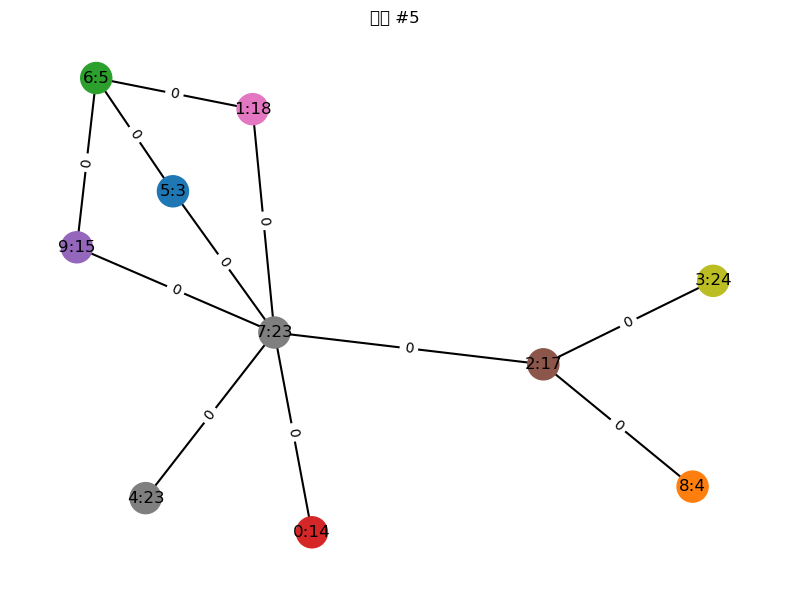

In [ ]:
import random
from collections import defaultdict, deque

# 在文件开头需要添加以下导入
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 读取图数据
def load_graph(file_path):
    vertices = {}  # {vertex_id: vertex_label}
    edges = set()  # {(v1, v2, edge_label)}
    adj_list = defaultdict(list)  # {vertex_id: [(neighbor_id, edge_label)]}

    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if parts[0] == 'v':
                vertex_id, vertex_label = int(parts[1]), int(parts[2])
                vertices[vertex_id] = vertex_label
            elif parts[0] == 'e':
                v1, v2, edge_label = int(parts[1]), int(parts[2]), int(parts[3])
                edge = (min(v1, v2), max(v1, v2), edge_label)  # 无向图
                edges.add(edge)
                adj_list[v1].append((v2, edge_label))
                adj_list[v2].append((v1, edge_label))

    return vertices, edges, adj_list

# 添加可视化子图的函数
def visualize_subgraph(remapped_vertices, remapped_edges, figure_index=None):
    """
    使用NetworkX和Matplotlib可视化子图
    
    参数:
    - remapped_vertices: 重新映射后的顶点 {id: label}
    - remapped_edges: 重新映射后的边 {(v1, v2, edge_label)}
    - figure_index: 图表索引，用于区分多个子图
    """
    # 创建一个无向图
    G = nx.Graph()
    
    # 添加节点和节点标签
    for node_id, node_label in remapped_vertices.items():
        G.add_node(node_id, label=node_label)
    
    # 添加边和边标签
    for v1, v2, edge_label in remapped_edges:
        G.add_edge(v1, v2, label=edge_label)
    
    # 创建不同颜色的节点，基于节点标签
    unique_node_labels = set(remapped_vertices.values())
    color_map = {}
    colors = list(mcolors.TABLEAU_COLORS)  # 获取一组预定义的颜色
    
    for i, label in enumerate(unique_node_labels):
        color_map[label] = colors[i % len(colors)]
    
    node_colors = [color_map[G.nodes[node]['label']] for node in G.nodes()]
    
    # 创建图形
    plt.figure(figsize=(8, 6))
    if figure_index is not None:
        plt.title(f"子图 #{figure_index}")
    else:
        plt.title("子图可视化")
    
    # 使用spring布局算法
    pos = nx.spring_layout(G, seed=42)
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    
    # 绘制边
    nx.draw_networkx_edges(G, pos, width=1.5)
    
    # 添加节点标签
    nx.draw_networkx_labels(G, pos, labels={n: f"{n}:{G.nodes[n]['label']}" for n in G.nodes()})
    
    # 添加边标签
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # 显示或保存图形
    plt.tight_layout()
    plt.axis('off')
    
    # 如果需要保存图片
    # if figure_index is not None:
    #     plt.savefig(f"subgraph_{figure_index}.png", format="PNG", dpi=150)
    
    plt.show()

# BFS 采样顶点并构建诱导子图
def sample_subgraph(vertices, edges, adj_list, start_vertex, target_vertex_count, target_edge_count):
    sampled_vertices = set()
    queue = deque([start_vertex])
    sampled_vertices.add(start_vertex)

    # BFS 采样，直到达到目标顶点数
    while queue and len(sampled_vertices) < target_vertex_count:
        current_vertex = queue.popleft()
        neighbors = adj_list[current_vertex]
        random.shuffle(neighbors)
        remaining_capacity = target_vertex_count - len(sampled_vertices)
        selected_neighbors = neighbors[:min(remaining_capacity, len(neighbors))]

        for neighbor_id, _ in selected_neighbors:
            if neighbor_id not in sampled_vertices:
                sampled_vertices.add(neighbor_id)
                queue.append(neighbor_id)

    # 获取诱导子图的边
    sampled_edges = set()
    for v1, v2, edge_label in edges:
        if v1 in sampled_vertices and v2 in sampled_vertices:
            sampled_edges.add((v1, v2, edge_label))

    # 如果边数过多，尝试减少顶点
    while (len(sampled_edges) > target_edge_count and len(sampled_vertices)) > 1:
        # 随机移除一个顶点
        vertex_to_remove = random.choice(list(sampled_vertices))
        sampled_vertices.remove(vertex_to_remove)
        # 重新计算边
        sampled_edges = {e for e in sampled_edges if e[0] in sampled_vertices and e[1] in sampled_vertices}

    # 如果边数不足，尝试增加顶点
    while len(sampled_edges) < target_edge_count and queue:
        current_vertex = queue.popleft()
        neighbors = adj_list[current_vertex]
        random.shuffle(neighbors)
        for neighbor_id, _ in neighbors:
            if neighbor_id not in sampled_vertices:
                sampled_vertices.add(neighbor_id)
                queue.append(neighbor_id)
                # 更新边
                for v1, v2, edge_label in edges:
                    if v1 in sampled_vertices and v2 in sampled_vertices:
                        sampled_edges.add((v1, v2, edge_label))
                break  # 只加一个顶点后检查

    return sampled_vertices, sampled_edges

# 重构子图索引
def remap_subgraph(vertices, sampled_vertices, sampled_edges):
    # 创建旧 ID 到新 ID 的映射，从 0 开始
    old_to_new = {old_id: new_id for new_id, old_id in enumerate(sorted(sampled_vertices), 0)}
    # 重构顶点: {new_id: label}
    remapped_vertices = {old_to_new[old_id]: vertices[old_id] for old_id in sampled_vertices}
    # 重构边: [(new_v1, new_v2, edge_label)]
    remapped_edges = {(old_to_new[v1], old_to_new[v2], edge_label) for v1, v2, edge_label in sampled_edges}
    return remapped_vertices, remapped_edges

# 输出子图
def print_subgraph(remapped_vertices, remapped_edges):
    print("Remapped Induced Subgraph:")
    for vertex_id in sorted(remapped_vertices.keys()):
        print(f"v {vertex_id} {remapped_vertices[vertex_id]}")
    for v1, v2, edge_label in sorted(remapped_edges):
        print(f"e {v1} {v2} {edge_label}")
    print(f"Vertex count: {len(remapped_vertices)}, Edge count: {len(remapped_edges)}")

# 主函数
def main(file_path="data.graph", target_vertex_count=5, target_edge_count=7, num_samples=5):
    print("Loading graph data...")
    vertices, edges, adj_list = load_graph(file_path)
    print(f"Loaded {len(vertices)} vertices and {len(edges)} edges.")

    for i in range(num_samples):
        # 检查输入是否合理
        max_possible_edges = (target_vertex_count * (target_vertex_count - 1)) // 2
        if target_edge_count > max_possible_edges:
            print(f"Warning: Target edge count {target_edge_count} exceeds maximum possible edges {max_possible_edges} for {target_vertex_count} vertices.")
            target_edge_count = max_possible_edges

        start_vertex = random.choice(list(vertices.keys()))
        sampled_vertices, sampled_edges = sample_subgraph(vertices, edges, adj_list, start_vertex, target_vertex_count, target_edge_count)
        remapped_vertices, remapped_edges = remap_subgraph(vertices, sampled_vertices, sampled_edges)
        print_subgraph(remapped_vertices, remapped_edges)

        # 可视化这个子图
        visualize_subgraph(remapped_vertices, remapped_edges, figure_index=i+1)



# 示例运行
if __name__ == "__main__":
    num = 5
    main("/home/cc/haibin2/livejournal/30/data_graph/data.graph", target_vertex_count=6, target_edge_count=20, num_samples=num)

# main("/home/cc/haibin2/livejournal/30/data_graph/data.graph", subgraph_size=8)